In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 8]

In [9]:
# Import unpack.py from the BoloCalc/src/ directory
BoloCalcPath = 'BoloCalc/'
src_path = BoloCalcPath+'src'
if src_path not in sys.path:
    sys.path.append(src_path)
    
exp_dir = BoloCalcPath+'Experiments/Atacama/Real_Bands_20210115/'
#import unpack as up
#unpack.unpack_parameter_vary(exp_dir, '20201106_15_44_43')
Tel = 'CDLAT'

Text(0.5, 1.0, 'V5 - CD LAT')

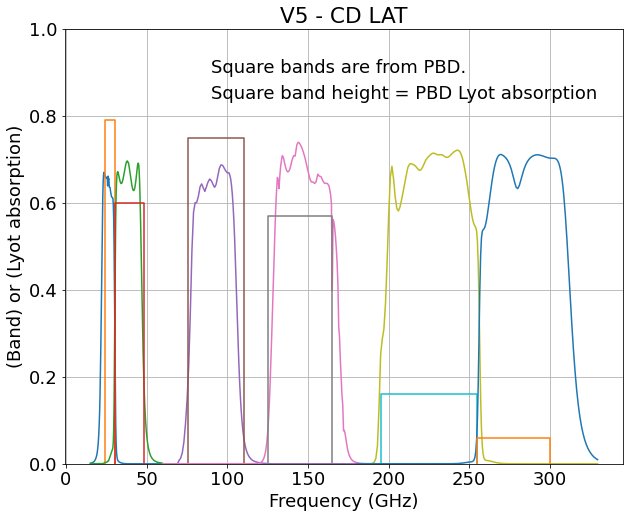

In [10]:
plotvals = {'LF':{'1':{},'2':{}},'MF':{'1':{},'2':{}},'UHF':{'1':{},'2':{}}}
plotvals['LF']['1']['band_low']=24
plotvals['LF']['1']['band_high']=30
plotvals['LF']['1']['pbd_lyot_eff']= 0.79
plotvals['LF']['2']['band_low']=30
plotvals['LF']['2']['band_high']=48
plotvals['LF']['2']['pbd_lyot_eff']= 0.60
plotvals['MF']['1']['band_low']=75.5
plotvals['MF']['1']['band_high']=110.5
plotvals['MF']['1']['pbd_lyot_eff']= 0.75
plotvals['MF']['2']['band_low']=125
plotvals['MF']['2']['band_high']=165
plotvals['MF']['2']['pbd_lyot_eff']= 0.57
plotvals['UHF']['1']['band_low']=195
plotvals['UHF']['1']['band_high']=255
plotvals['UHF']['1']['pbd_lyot_eff']= 0.16
plotvals['UHF']['2']['band_low']=255
plotvals['UHF']['2']['band_high']=300
plotvals['UHF']['2']['pbd_lyot_eff']= 0.06

subplotnum = 1
#for cam in ['MF','UHF']:
#        lyotfile = exp_dir+Tel+'/'+cam+'/config/Bands/Optics/Lyot_Absorption.txt'
#        Lfreq,LyotAbs = np.loadtxt(lyotfile,unpack=True)
#        plotvals[cam]['Lyot_abs']=LyotAbs
#        plotvals[cam]['Lyot_freq']=Lfreq
#        plt.plot(plotvals[cam]['Lyot_freq'],plotvals[cam]['Lyot_abs'] )

for cam in ['LF','MF','UHF']:
    for ch in ['1','2']:
        bandfile = exp_dir+Tel+'/'+cam+'/config/Bands/Detectors/'+cam+'_'+ch+'.txt'
        Bfreq,BandTrans = np.loadtxt(bandfile,unpack=True)
        plotvals[cam]['Band_trans']=BandTrans
        plotvals[cam]['Band_freq']=Bfreq
        plt.plot(Bfreq,BandTrans)
        x_sqbandvec = np.array([plotvals[cam][ch]['band_low'],plotvals[cam][ch]['band_low'],plotvals[cam][ch]['band_high'],plotvals[cam][ch]['band_high']])
        y_sqbandvec = np.array([0,plotvals[cam][ch]['pbd_lyot_eff'],plotvals[cam][ch]['pbd_lyot_eff'],0])
        plt.plot(x_sqbandvec,y_sqbandvec)
        

plt.grid()
plt.ylim(0,1)
plt.xlabel('Frequency (GHz)')
plt.ylabel('(Band) or (Lyot absorption)')
plt.text(90,0.9,'Square bands are from PBD.')
plt.text(90,0.84,'Square band height = PBD Lyot absorption')
plt.title('V5 - CD LAT')


Real Center = 25.76GHz, Approx Center = 25.75, Frac. bandwidth = 0.330
Real Center = 38.96GHz, Approx Center = 38.75, Frac. bandwidth = 0.452
Real Center = 91.76GHz, Approx Center = 91.50, Frac. bandwidth = 0.317
Real Center = 148.18GHz, Approx Center = 148.50, Frac. bandwidth = 0.276
Real Center = 226.54GHz, Approx Center = 227.00, Frac. bandwidth = 0.256
Real Center = 285.80GHz, Approx Center = 285.50, Frac. bandwidth = 0.207


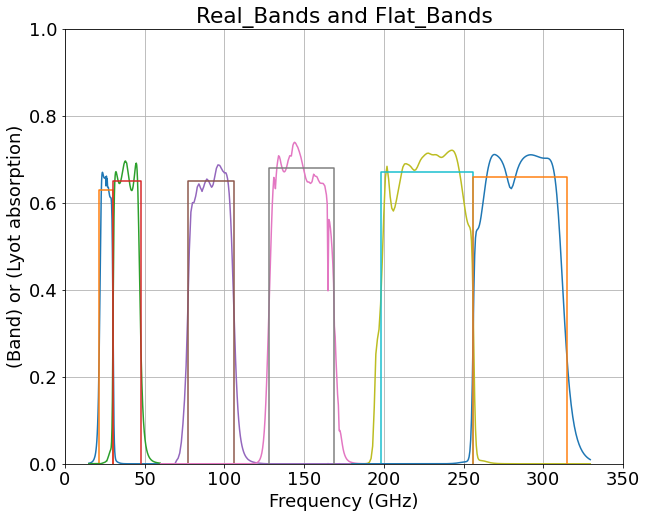

In [11]:
## plotvals = {'LF':{'1':{},'2':{}},'MF':{'1':{},'2':{}},'UHF':{'1':{},'2':{}}}
plotvals['LF']['1']['band_low']=21.5
plotvals['LF']['1']['band_high']=30.0
plotvals['LF']['1']['det_eff']= 0.63
plotvals['LF']['2']['band_low']=30.0
plotvals['LF']['2']['band_high']=47.5
plotvals['LF']['2']['det_eff']= 0.65
plotvals['MF']['1']['band_low']=77
plotvals['MF']['1']['band_high']=106
plotvals['MF']['1']['det_eff']= 0.65
plotvals['MF']['2']['band_low']=128
plotvals['MF']['2']['band_high']=169
plotvals['MF']['2']['det_eff']= 0.68
plotvals['UHF']['1']['band_low']=198
plotvals['UHF']['1']['band_high']=256
plotvals['UHF']['1']['det_eff']= 0.67
plotvals['UHF']['2']['band_low']=256
plotvals['UHF']['2']['band_high']=315
plotvals['UHF']['2']['det_eff']= 0.66

for cam in ['LF','MF','UHF']:
    for ch in ['1','2']:
        bandfile = exp_dir+Tel+'/'+cam+'/config/Bands/Detectors/'+cam+'_'+ch+'.txt'
        Bfreq,BandTrans = np.loadtxt(bandfile,unpack=True)
        nu_center_real = np.trapz(Bfreq*BandTrans,Bfreq)/np.trapz(BandTrans,Bfreq)
        plotvals[cam]['Band_trans']=BandTrans
        plotvals[cam]['Band_freq']=Bfreq
        plt.plot(Bfreq,BandTrans)
        x_sqbandvec = np.array([plotvals[cam][ch]['band_low'],plotvals[cam][ch]['band_low'],plotvals[cam][ch]['band_high'],plotvals[cam][ch]['band_high']])
        y_sqbandvec = np.array([0,plotvals[cam][ch]['det_eff'],plotvals[cam][ch]['det_eff'],0])
        plt.plot(x_sqbandvec,y_sqbandvec)
        
        nu_center =    (plotvals[cam][ch]['band_high']+plotvals[cam][ch]['band_low'])/2
        nu_bandwidth = (plotvals[cam][ch]['band_high']-plotvals[cam][ch]['band_low'])
        frac_bandwidth = nu_bandwidth/nu_center
        
        print('Real Center = {0:3.2f}GHz, Approx Center = {1:3.2f}, Frac. bandwidth = {2:3.3f}'.format(nu_center_real,nu_center,frac_bandwidth))
        

plt.ylim(0,1)
plt.xlim(0,350)
plt.xlabel('Frequency (GHz)')
plt.ylabel('(Band) or (Lyot absorption)')
#plt.text(20,0.9,'Flat_Bands are approximations by eye to Real_Bands.')
#plt.text(90,0.84,'Square band height = PBD Lyot absorption')
plt.title('Real_Bands and Flat_Bands')
plt.grid()




Text(0.5, 1.0, 'Real_Bands and Lowpass Edge Filters')

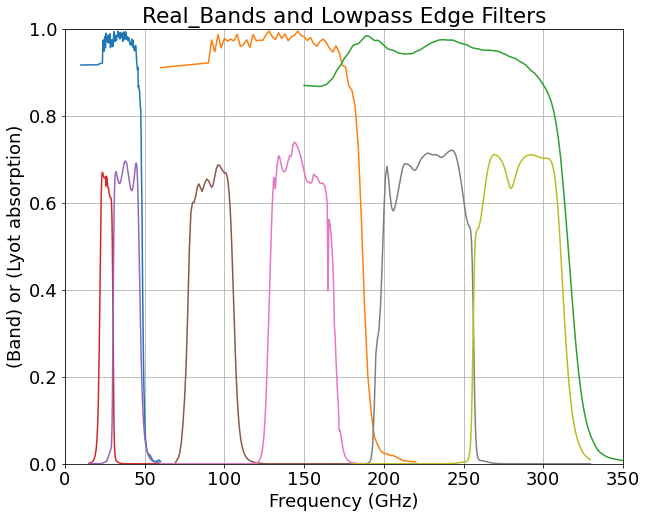

In [12]:
for cam in ['LF','MF','UHF']:
    filterfile = exp_dir+Tel+'/'+cam+'/config/Bands/Optics/LowPass_Reflection.txt'
    Ffreq,FiltRefl = np.loadtxt(filterfile,unpack=True)
    plt.plot(Ffreq,1-FiltRefl)
    
plt.ylim(0,1)
plt.xlim(0,350)
plt.xlabel('Frequency (GHz)')
plt.ylabel('(Band) or (Lyot absorption)')
plt.grid()


for cam in ['LF','MF','UHF']:
    for ch in ['1','2']:
        bandfile = exp_dir+Tel+'/'+cam+'/config/Bands/Detectors/'+cam+'_'+ch+'.txt'
        Bfreq,BandTrans = np.loadtxt(bandfile,unpack=True)
        nu_center_real = np.trapz(Bfreq*BandTrans,Bfreq)/np.trapz(BandTrans,Bfreq)
        plotvals[cam]['Band_trans']=BandTrans
        plotvals[cam]['Band_freq']=Bfreq
        plt.plot(Bfreq,BandTrans)

plt.title('Real_Bands and Lowpass Edge Filters')

KeyError: 'MF1'

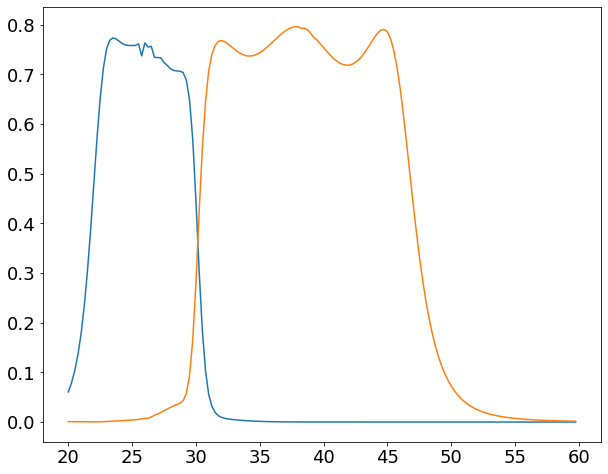

In [6]:
exp_dir = BoloCalcPath+'Experiments/Pole/Real_Bands_20210115/'
#import unpack as up
#unpack.unpack_parameter_vary(exp_dir, '20201106_15_44_43')
Tel = 'SAT'

for cam in ['LF','MF1','MF2','UHF']:
    for ch in ['1','2']:
        bandfile = exp_dir+Tel+'/'+cam+'/config/Bands/Detectors/'+cam+'_'+ch+'.txt'
        Bfreq,BandTrans = np.loadtxt(bandfile,unpack=True)
        plotvals[cam]['Band_trans']=BandTrans
        plotvals[cam]['Band_freq']=Bfreq
        plt.plot(Bfreq,BandTrans)
        #x_sqbandvec = np.array([plotvals[cam][ch]['band_low'],plotvals[cam][ch]['band_low'],plotvals[cam][ch]['band_high'],plotvals[cam][ch]['band_high']])
        #y_sqbandvec = np.array([0,plotvals[cam][ch]['pbd_lyot_eff'],plotvals[cam][ch]['pbd_lyot_eff'],0])
        #plt.plot(x_sqbandvec,y_sqbandvec)
        

plt.grid()
plt.ylim(0,1)
plt.xlabel('Frequency (GHz)')
plt.ylabel('(Band) or (Lyot absorption)')
plt.text(90,0.9,'Square bands are from PBD.')
plt.text(90,0.84,'Square band height = PBD Lyot absorption')
plt.title('V5 - CD LAT')



In [ ]:
dir1 = '/Users/ruhl/code/bolocalc/BoloCalc/Experiments/Pole/Real_Bands_20210115/SAT/MF1/config/Bands/Detectors/'
for file1 in ['MF1_1.txt','MF1_2.txt']:  #,'MF_3.txt','MF_4.txt']:
    inputfile = dir1+file1
    freq,Trans = np.loadtxt(inputfile,unpack=True)
    plt.plot(freq,Trans)
dir1 = '/Users/ruhl/code/bolocalc/BoloCalc/Experiments/Pole/Real_Bands_20210115/SAT/MF2/config/Bands/Detectors/'
for file1 in ['MF2_1.txt','MF2_2.txt']:  #,'MF_3.txt','MF_4.txt']:
    inputfile = dir1+file1
    freq,Trans = np.loadtxt(inputfile,unpack=True)
    plt.plot(freq,Trans)